# Computer Vision & Deep Learning - SEP Practical

## Exercise Sheet 3: Filters, Convolutions, and Regression

**Due on 16.09.11., 10:00**

## Important notes

- Email: Frequently check your email address registered for Moodle. All notifications regarding the course will be sent via Moodle.
- Moodle: Please use the Moodle platform and post your questions to the forum. They will be answered by us or your fellow students.
-  Submission: Put your code and potentially other materials inside a single ZIP file. If you use jupyter notebooks, please always create a PDF file and include it in your ZIP file. The final submission should therefore be a **single zip** file with a **PDF of your code** and the **original code** inside. The ZIP file should contain your surname and your matriculation number (Surname-MatriculationNumber.zip). Submissions that fail to follow the naming convention will not be graded!



In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

---
## 1. Downsampling and Anti-aliasing (11)
Downsampling in images refers to the process of reducing the resolution of an image and therefore compress the image file. When we are performing downsampling, high-frequency details may not be accurately represented or lost in the lower-resolution version, which leads to aliasing, where sharp edges appear jagged or distorted. In the following exercise you will get your hands on how to implement one of the simplest anti-alising algorithm.

### 1.1 Read data (0.5)
Please find the attached "munich.jpg" image file and convert that to numpy format. Also normalize the image to range [0, 1].

In [2]:
img = Image.open('munich.jpg')
img = np.array(img) / 255

### 1.2 Naive downsampling (2)

First of all, we want to try naive downsampling.
Downsampling an image means reducing the size of that image. As a first step, we do it naively by keeping only specific rows. Downsample the image to a quarter of it's resolution by keeping every fourth row and column. Visualize them using the matplotlib library using the same figure size. Don't forget to caption them respectively.

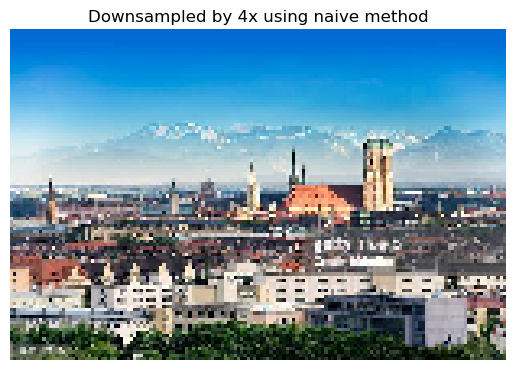

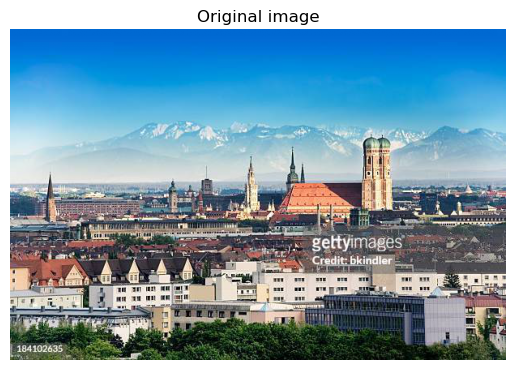

In [3]:
from matplotlib import pyplot as plt
img_down_naive = img[::4, ::4, :]
plt.imshow(img_down_naive)
plt.axis('off')
plt.title('Downsampled by 4x using naive method')
plt.show()
plt.imshow(img)
plt.axis('off')
plt.title('Original image')
plt.show()

### 1.3 Implement a Gaussian Kernel (3)

Next, we will try anti-aliasing, which we covered in the lecture. To do that, we need to implement a 2D Gaussian kernel first. A Gaussian kernel is defined by the following equation:

$f(x,y) = \frac{1}{2\pi\sigma^2} \exp{-\frac{x^2+y^2}{2\sigma^2}}$

Implement a function that computes a Gaussian filter as defined above. The function should take in the kernel size and variance as inputs. Then it should output the kernel represented as an n × n NumPy array. 

**Hint**: Make sure that the values of your Gaussian filter sum up to 1.

In [4]:
def gaussian_filter(size: int, var: float) -> np.ndarray:
    
    # if size is not odd number, the resulting kernel shifts the image
    grid_range = np.linspace(-np.floor((size-1)/2), np.ceil((size-1)/2), size)
    x, y = np.meshgrid(grid_range, grid_range)
    kernel = 1./(2*np.pi*var) * np.exp(-1./(2*var)*(np.square(x)+np.square(y)))
    
    # normalize the filter
    return kernel / np.sum(kernel)

### 1.4 Visualization (0.5)

Visualize the Gaussian kernel with size of 200 * 200 and variance of 1000 using matplotlib. Also include a colorbar to the plot.

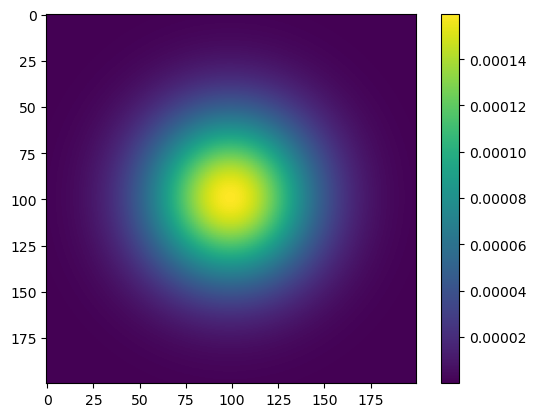

In [5]:
kernel = gaussian_filter(200, var=1000)
plt.imshow(kernel)
plt.colorbar()
plt.show()

### 1.5 Convolution (3)

Next, we apply the Gaussian kernel to the image using convolution. It is defined as the following equation:

$(g \ast f)(x,y) = \sum\limits_{dx=-a}^a \sum\limits_{dy=-b}^b g(x + dx, y + dy)f(dx,dy)$

Implement a function which convolves an image with a Gaussian kernel.

**Hint**: Do it seperately for each of the RGB channels

In [6]:
def conv2d(x, kernel):
    """
    Performs a 2D convolution operation with a single kernel.

    Args:
        x      (array): the input array of shape (H, W, 3).
        kernel (array): the kernel that is convolved over the input.

    Returns:
        out    (array): the output array.
    """
    assert kernel.shape[0] == kernel.shape[1]

    x_height = x.shape[0]
    x_width = x.shape[1]
   
    f_size = kernel.shape[0]
    out_height = int(x_height - f_size + 1)
    out_width = int(x_width - f_size + 1)
    out = np.zeros((out_height, out_width, 3))

    for h in range(out_height):
        for w in range(out_width):
            for c in range(3):
                out[h, w, c] = np.sum(x[h:h + f_size, w:w + f_size, c] * kernel)

    return out

### 1.6 Downsampling with anti-aliasing (2)
Apply a Gaussian filter of size 5 * 5 and variance of 8 to the original image, and then apply the naive downsampling method.
Plot the resulting image together with the naive downsampled image without anti-aliasing. Do you observe a difference?

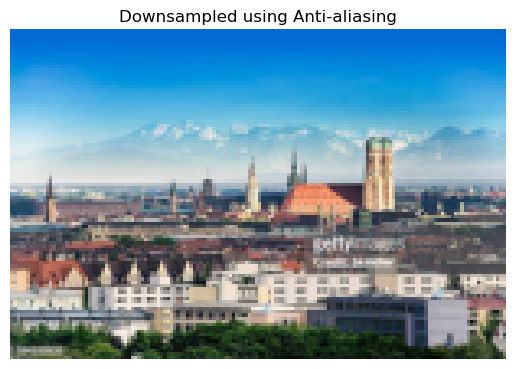

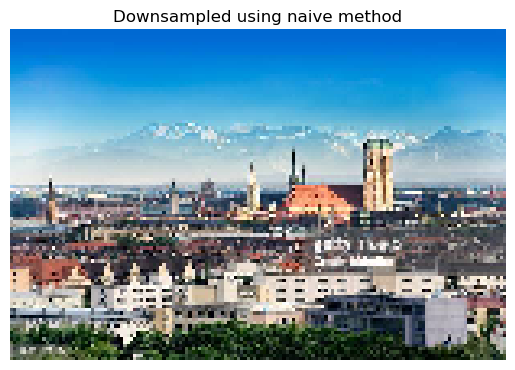

In [7]:
conv_img = conv2d(img, gaussian_filter(5, 8))
img_down_gaussian = conv_img[::4, ::4, :]
plt.imshow(img_down_gaussian)
plt.axis('off')
plt.title('Downsampled using Anti-aliasing')
plt.show()
plt.imshow(img_down_naive)
plt.axis('off')
plt.title('Downsampled using naive method')
plt.show()

---
## 2. Linear Regression (9)

In the last lecture we have learned about linear regression. Now we want to get some first hand-on experience.

### 2.1 Read Data (0.5)
As a first step, please load the datapoints from the given `regression_data.txt` file using the inbuilt `open()` function. You can recycle the function from the first exercise, but this time please store it as `numpy` array instead of a list of lists. Please also print the shape of the data. The first column corresponds to $x$ and the second to $y$.

In [8]:
def read_data(filepath):
    # TODO: read the file and store the datapoints in a list
    data = []
    with open(filepath, 'r') as f:
        for line in f:
            line = line.split(",")
            if line[-1].endswith("\n"):
                line[-1] = line[-1][:-1]
            data.append([float(coord) for coord in line])
    return np.array(data)

In [9]:
my_data = read_data("regression_data.txt")
print(my_data.shape)

(100, 2)


### 2.2 Visualize Data (0.5)

Please visualize the data with [matplotlib](https://matplotlib.org/stable/api/) package. Ensure that you label the axes.

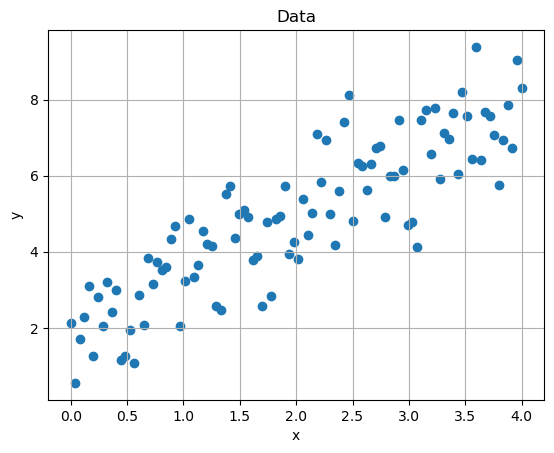

In [10]:
plt.scatter(my_data[:, 0], my_data[:, 1])
plt.grid()
plt.title("Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 2.3 Regression Model (2)

Please write a `RegressionModel` class, that accepts a weight and a bias as class attributes. The classes `forward` function should make a prediction from a given $x$.

In [11]:
class RegressionModel:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def forward(self, x):
        return self.weights * x + self.bias

In [12]:
rm = RegressionModel(1, 0)
y_pred = rm.forward(2.2)
print("Prediction:", y_pred)

Prediction: 2.2


### 2.4 Prediction (2)

If we instantiate the model it can give us a prediction for any $x$. Of course, the prediction highly depends on the parameters of our model, i.e. the weight and the bias.

Please make two plots where you show our data and the prediction function for the range [-1, 5] with the following parameter settings:

Plot 1: $b=1.6$
- $w=1.4$
- $w=1.5$
- $w=1.6$
- $w=1.7$

Plot 2: $b=2.0$
- $w=1.4$
- $w=1.5$
- $w=1.6$
- $w=1.7$

Hence, each plot shows the data points from the `regression_data.txt` and four prediction models (lines). Make sure that you label the axes correctly and also include labels with the corresponding weight and bias for each prediction function.

Which model would you consider the best?

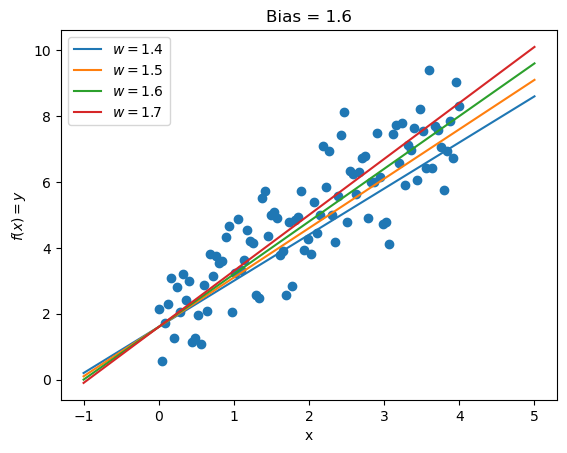

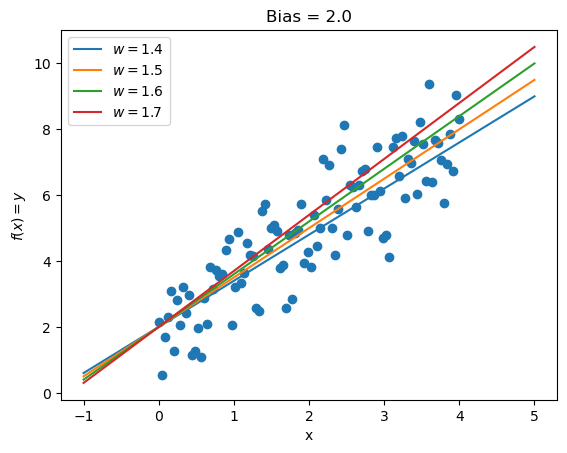

In [13]:
x_range = np.linspace(-1, 5)

weights = [1.4, 1.5, 1.6, 1.7]
biases = [1.6, 2.]

for b in biases:
    plt.scatter(my_data[:, 0], my_data[:, 1])
    plt.title(f"Bias = {b}")
    for w in weights:
        model = RegressionModel(w, b)
        plt.plot(x_range, model.forward(x_range), label=f"$w={w}$")
    plt.xlabel("x")
    plt.ylabel("$f(x)=y$")
    plt.legend()
    plt.show()

### 2.5 Mean-Squared Error (1)

Please implement the mean squared error function that returns the MSE between two vectors, the ground truth value $y$ and the predicted value of our model $\hat{y}$.

$$
MSE(y, \hat{y}) = \sqrt{\sum^n_{i=1} (y_i-\hat{y}_i)^2}
$$

Please ensure a vectorized implementation. The output of your function should be a single value.

In [14]:
def mean_squared_error(y, y_hat):
    return ((y - y_hat)**2).mean(axis=0)


# should be zero
y_test = np.array([1., 1.])
y_pred_test = np.array([1., 1.])
print(mean_squared_error(y_test, y_pred_test))

# should be 0.5
y_pred_test = np.array([1., 2.])
print(mean_squared_error(y_test, y_pred_test))

0.0
0.5


### 2.6 Evaluation (1)

With the MSE we now have a method to evaluate our different models. Please use the MSE to evaluate each invididual model from task 1.4 on the given `regression_data.txt` dataset and print out the result.

Which model performs best?

In [15]:
x_range = np.linspace(-1, 5)

weights = [1.4, 1.5, 1.6, 1.7]
biases = [1.6, 2.]

ipt = my_data[:, 0]
ground_truth = my_data[:, 1]

for b in biases:
    for w in weights:
        model = RegressionModel(w, b)
        prediction = model.forward(ipt)
        mse = mean_squared_error(ground_truth, prediction)
        print(f"w={w}, b={b} : {mse:.4f}")

w=1.4, b=1.6 : 1.2903
w=1.5, b=1.6 : 1.1041
w=1.6, b=1.6 : 1.0252
w=1.7, b=1.6 : 1.0534
w=1.4, b=2.0 : 1.0267
w=1.5, b=2.0 : 1.0005
w=1.6, b=2.0 : 1.0816
w=1.7, b=2.0 : 1.2698


### 2.7 Final result (2)

Please plot the best model with the lowest MSE, as well as the data. Then do a prediction for the given data points and also include them in the plot (but of course, with a different color).

In [16]:
test_data = np.array([1.2, 2., 3.5])

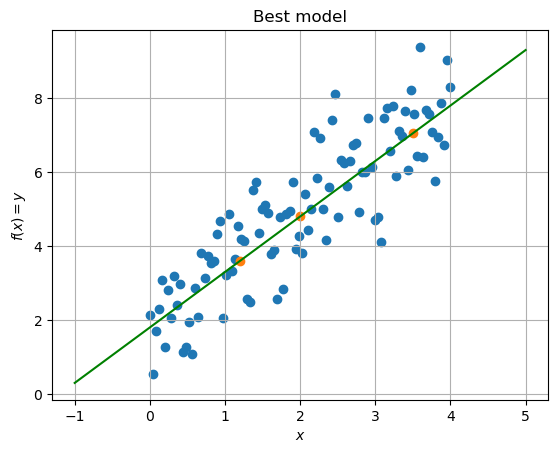

In [17]:
plt.scatter(my_data[:, 0], my_data[:, 1])

best_model = RegressionModel(1.5, 1.8)
x_range = np.linspace(-1, 5)

plt.plot(x_range, best_model.forward(x_range), c="green")
plt.scatter(test_data, best_model.forward(test_data))
plt.grid()
plt.title("Best model")
plt.xlabel("$x$")
plt.ylabel("$f(x)=y$")
plt.show()

---